In [65]:
import pandas as pd
df = pd.read_csv('data/medicare-hospital-cost-report-puf-2014-1.csv')
df.head()

,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
0,364007,TWIN VALLEY BHO - COLUMBUS CAMPUS,2200 WEST BROAD STREET,COLUMBUS,OH,43223,FRANKLIN,18140.0,U,PH,...,-49244162.0,NaN,-49244162.0,NaN,-49244162.0,NaN,NaN,NaN,NaN,NaN
1,264010,ST. LOUIS PSYCHIATRIC REHAB CTR.,500 ARSENAL STREET,ST.LOUIS,MO,63119,ST.LOUIS CITY,41180.0,U,PH,...,-2506210.0,16678.0,-2489532.0,NaN,-2489532.0,0.84,NaN,NaN,NaN,NaN
2,334015,ROCKLAND P.C.,140 OLD ORANGEBURG ROAD,ORANGEBURG,NY,10962-1196,ROCKLAND,35004.0,U,PH,...,-113549859.0,NaN,-113549859.0,NaN,-113549859.0,7.49,NaN,NaN,NaN,NaN
3,364011,NORTHCOAST BHO,1756 SAGAMORE ROAD,NORTHFIELD,OH,44109-1911,SUMMIT,10420.0,U,PH,...,-50727002.0,NaN,-50727002.0,NaN,-50727002.0,NaN,NaN,NaN,NaN,NaN
4,334020,ROCHESTER P.C.,1111 ELMWOOD AVE.,ROCHESTER,NY,14620-3965,MONROE,40380.0,U,PH,...,-40454985.0,NaN,-40454985.0,NaN,-40454985.0,31.21,NaN,NaN,NaN,NaN


In [3]:
df.columns.values

array(['Provider CCN', 'Hospital Name', 'Street Address', 'City',
       'State Code', 'Zip Code', 'County', 'Medicare CBSA Number',
       'Rural Versus Urban', 'CCN Facility Type', 'Provider Type',
       'Type of Control', 'Fiscal Year Begin Date',
       'Fiscal Year End Date', 'FTE - Employees on Payroll',
       'Number of Interns and Residents (FTE)', 'Total Days Title V',
       'Total Days Title XVIII', 'Total Days Title XIX',
       'Total Days (V + XVIII + XIX + Unknown)', 'Number of Beds',
       'Total Bed Days Available', 'Total Discharges Title V',
       'Total Discharges Title XVIII', 'Total Discharges Title XIX',
       'Total Discharges (V + XVIII + XIX + Unknown)',
       'Total Days Title V + Total for all Subproviders',
       'Total Days Title XVIII + Total for all Subproviders',
       'Total Days Title XIX + Total for all Subproviders',
       'Total Days (V + XVIII + XIX + Unknown) + Total for all Subprovid',
       'Number of Beds + Total for all Subproviders

In [4]:
#Drop name and address
to_drop = ['Hospital Name', 'Street Address']
df = df.drop(to_drop, axis=1)

In [5]:
def column_to_numeric(x):
    for index, r in enumerate(ratings):
        if x==r:
            return index
    return -1

In [6]:
from pandas.api.types import is_string_dtype
new_df = df
for column in df:
    if is_string_dtype(df[column]):
        new_df[column] = df[column].astype('category').cat.codes

new_df.head()


,Provider CCN,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,Provider Type,Type of Control,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
0,364007,572,37,1983,543,18140.0,1,4,2,10,...,-49244162.0,NaN,-49244162.0,NaN,-49244162.0,NaN,NaN,NaN,NaN,NaN
1,264010,2670,25,3183,1458,41180.0,1,4,2,10,...,-2506210.0,16678.0,-2489532.0,NaN,-2489532.0,0.84,NaN,NaN,NaN,NaN
2,334015,2062,36,405,1292,35004.0,1,4,2,10,...,-113549859.0,NaN,-113549859.0,NaN,-113549859.0,7.49,NaN,NaN,NaN,NaN
3,364011,1994,37,2033,1486,10420.0,1,4,2,10,...,-50727002.0,NaN,-50727002.0,NaN,-50727002.0,NaN,NaN,NaN,NaN,NaN
4,334020,2379,36,532,1005,40380.0,1,4,2,10,...,-40454985.0,NaN,-40454985.0,NaN,-40454985.0,31.21,NaN,NaN,NaN,NaN


In [7]:
#View percentage of missing values in each column
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
missing_value_df = pd.DataFrame({'column_name': new_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)


In [8]:
#Drop columns with over 50% missing values
missing_value_df = missing_value_df[percent_missing>=50]
missing_value_df.head()

c:\python34\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,column_name,percent_missing
Notes and Loans Payable (Short Term),Notes and Loans Payable (Short Term),51.872599
Other Current Assets,Other Current Assets,53.072983
Allowable DSH Percentage,Allowable DSH Percentage,54.097311
Disproporationate Share Adjustment,Disproporationate Share Adjustment,54.113316
"DRG amounts before October 1, 2013","DRG amounts before October 1, 2013",56.402049


In [10]:
to_drop = missing_value_df['column_name'].ravel() 
new_df = new_df.drop(to_drop, axis=1)
new_df.head()

,Provider CCN,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,Provider Type,Type of Control,...,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from Service to Patients,Total Other Income,Total Income,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges
0,364007,572,37,1983,543,18140.0,1,4,2,10,...,NaN,NaN,49244162.0,-49244162.0,NaN,-49244162.0,-49244162.0,NaN,NaN,NaN
1,264010,2670,25,3183,1458,41180.0,1,4,2,10,...,4790132.0,33822631.0,36328841.0,-2506210.0,16678.0,-2489532.0,-2489532.0,0.84,NaN,NaN
2,334015,2062,36,405,1292,35004.0,1,4,2,10,...,NaN,NaN,113549859.0,-113549859.0,NaN,-113549859.0,-113549859.0,7.49,NaN,NaN
3,364011,1994,37,2033,1486,10420.0,1,4,2,10,...,NaN,NaN,50727002.0,-50727002.0,NaN,-50727002.0,-50727002.0,NaN,NaN,NaN
4,334020,2379,36,532,1005,40380.0,1,4,2,10,...,NaN,NaN,40454985.0,-40454985.0,NaN,-40454985.0,-40454985.0,31.21,NaN,NaN


In [9]:
new_df.columns.values

array(['Provider CCN', 'City', 'State Code', 'Zip Code', 'County',
       'Medicare CBSA Number', 'Rural Versus Urban', 'CCN Facility Type',
       'Provider Type', 'Type of Control', 'Fiscal Year Begin Date',
       'Fiscal Year End Date', 'FTE - Employees on Payroll',
       'Number of Interns and Residents (FTE)', 'Total Days Title V',
       'Total Days Title XVIII', 'Total Days Title XIX',
       'Total Days (V + XVIII + XIX + Unknown)', 'Number of Beds',
       'Total Bed Days Available', 'Total Discharges Title V',
       'Total Discharges Title XVIII', 'Total Discharges Title XIX',
       'Total Discharges (V + XVIII + XIX + Unknown)',
       'Total Days Title V + Total for all Subproviders',
       'Total Days Title XVIII + Total for all Subproviders',
       'Total Days Title XIX + Total for all Subproviders',
       'Total Days (V + XVIII + XIX + Unknown) + Total for all Subprovid',
       'Number of Beds + Total for all Subproviders',
       'Total Bed Days Available + Tota

In [11]:
#Replace nan with -1
new_df = new_df.fillna(value=-1) 

In [45]:
new_df.head()

,Provider CCN,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,Provider Type,Type of Control,...,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from Service to Patients,Total Other Income,Total Income,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges
0,364007,572,37,1983,543,18140.0,1,4,2,10,...,-1.0,-1.0,49244162.0,-49244162.0,-1.0,-49244162.0,-49244162.0,-1.00,-1.0,-1.0
1,264010,2670,25,3183,1458,41180.0,1,4,2,10,...,4790132.0,33822631.0,36328841.0,-2506210.0,16678.0,-2489532.0,-2489532.0,0.84,-1.0,-1.0
2,334015,2062,36,405,1292,35004.0,1,4,2,10,...,-1.0,-1.0,113549859.0,-113549859.0,-1.0,-113549859.0,-113549859.0,7.49,-1.0,-1.0
3,364011,1994,37,2033,1486,10420.0,1,4,2,10,...,-1.0,-1.0,50727002.0,-50727002.0,-1.0,-50727002.0,-50727002.0,-1.00,-1.0,-1.0
4,334020,2379,36,532,1005,40380.0,1,4,2,10,...,-1.0,-1.0,40454985.0,-40454985.0,-1.0,-40454985.0,-40454985.0,31.21,-1.0,-1.0


In [13]:
#Drop name and address
to_drop = ['Fiscal Year Begin Date',
       'Fiscal Year End Date']
new_df = new_df.drop(to_drop, axis=1)

# Investigate net income

In [14]:
#Calculate mutual information, showing which features influence the rating most
from sklearn.feature_selection import mutual_info_classif

feature_scores = mutual_info_classif(new_df, new_df["Net Income"].astype(int))

In [15]:
import numpy as np
norm_feature_scores = feature_scores/np.max(feature_scores)
features = []
fscores = []
for score, fname in sorted(zip(norm_feature_scores, new_df.columns.values), reverse=True)[:30]:
    print(fname, score)
    features.append(fname)
    fscores.append(score)

Net Income 1.0
Total Current Assets 0.8835392096844972
Total Liabilities 0.863481233574582
Total Current Liabilities 0.8630093189395417
Total Other Assets 0.8566370829105461
Total Assets 0.8537979323018936
Land 0.8089711523635539
DRG Amounts Other Than Outlier Payments 0.7993908281106216
Total Long Term Liabilities 0.7952773818204981
Total Liabilities and Fund Balances 0.7930481095505295
Prepaid Expenses 0.7891058929920197
Buildings 0.7882732579804111
Total fixed Assets 0.7834485942640033
Cash on Hand and in Banks 0.7812738032306243
Total Income 0.7725801074167649
Accounts Payable 0.7702844187043381
Major Movable Equipment 0.7484465530757781
Accounts Receivable 0.7467544029966411
Type of Control 0.7362871468165868
Net Income from Service to Patients 0.7065107312066073
Salaries, Wages, and Fees Payable 0.7011781593947563
Total Fund Balances 0.6822141958057852
General Fund Balance 0.6821343270589267
Other Assets 0.6623050621136705
County 0.6571023129126756
Net Patient Revenue 0.654824921

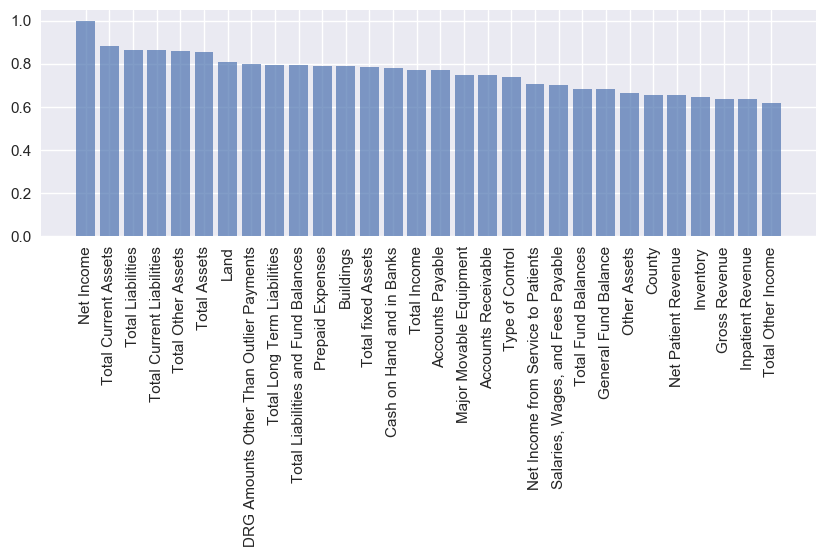

In [46]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 3)
rcParams['figure.dpi'] = 100
x = range(len(features))
plt.xticks(x, features, rotation=90)

plt.bar(x,fscores, align='center', alpha=0.7)
plt.show()

In [49]:
corr=new_df.corr()["Net Income"]
corr[np.argsort(corr, axis=0)[:30:-1]]

Net Income                                                                   1.000000
Total Income                                                                 0.988243
Net Income from Service to Patients                                          0.801042
Net Patient Revenue                                                          0.516580
Inpatient Revenue                                                            0.362374
Gross Revenue                                                                0.361324
Outpatient Revenue                                                           0.330810
Combined Outpatient + Inpatient Total Charges                                0.293628
Inpatient Total Charges                                                      0.290790
Outpatient Total Charges                                                     0.279720
Less Contractual Allowance and discounts on patients' accounts               0.277092
Total fixed Assets                                    

In [26]:
new_df.head(15)

,Provider CCN,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,Provider Type,Type of Control,...,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from Service to Patients,Total Other Income,Total Income,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges
0,364007,572,37,1983,543,18140.0,1,4,2,10,...,-1.0,-1.0,49244162.0,-49244162.0,-1.0,-49244162.0,-49244162.0,-1.00,-1.0,-1.0
1,264010,2670,25,3183,1458,41180.0,1,4,2,10,...,4790132.0,33822631.0,36328841.0,-2506210.0,16678.0,-2489532.0,-2489532.0,0.84,-1.0,-1.0
2,334015,2062,36,405,1292,35004.0,1,4,2,10,...,-1.0,-1.0,113549859.0,-113549859.0,-1.0,-113549859.0,-113549859.0,7.49,-1.0,-1.0
3,364011,1994,37,2033,1486,10420.0,1,4,2,10,...,-1.0,-1.0,50727002.0,-50727002.0,-1.0,-50727002.0,-50727002.0,-1.00,-1.0,-1.0
4,334020,2379,36,532,1005,40380.0,1,4,2,10,...,-1.0,-1.0,40454985.0,-40454985.0,-1.0,-40454985.0,-40454985.0,31.21,-1.0,-1.0
5,334021,2867,36,490,1115,46540.0,1,4,2,10,...,-1.0,-1.0,22960387.0,-22960387.0,-1.0,-22960387.0,-22960387.0,4.86,-1.0,-1.0
6,334064,739,36,441,-1,-1.0,0,4,2,10,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0
7,364014,2804,37,2033,896,45780.0,1,4,2,10,...,-1.0,-1.0,22607535.0,-22607535.0,-1.0,-22607535.0,-22607535.0,-1.00,-1.0,-1.0
8,364015,116,37,2143,61,99936.0,1,4,2,10,...,-1.0,-1.0,21298603.0,-21298603.0,-1.0,-21298603.0,-21298603.0,-1.00,-1.0,-1.0
9,381313,2275,39,5105,386,99938.0,0,0,4,2,...,29962464.0,28124951.0,25737204.0,2387747.0,1786535.0,4174282.0,4174282.0,0.52,5042612.0,13533484.0


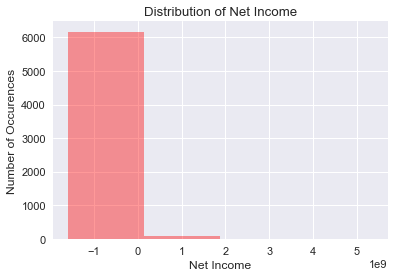

In [34]:
sns.distplot(new_df['Net Income'], color="r", kde=False, bins=4)
plt.title("Distribution of Net Income")
plt.ylabel("Number of Occurences")
plt.xlabel("Net Income");

In [36]:
df[['Rural Versus Urban','Net Income']].groupby(['Rural Versus Urban'],
as_index=False).mean().sort_values(by='Rural Versus Urban', ascending=False)
#shows that urban hospitals have 10 times higher net income

,Rural Versus Urban,Net Income
1,1,1.135652e+07
0,0,1.033379e+06


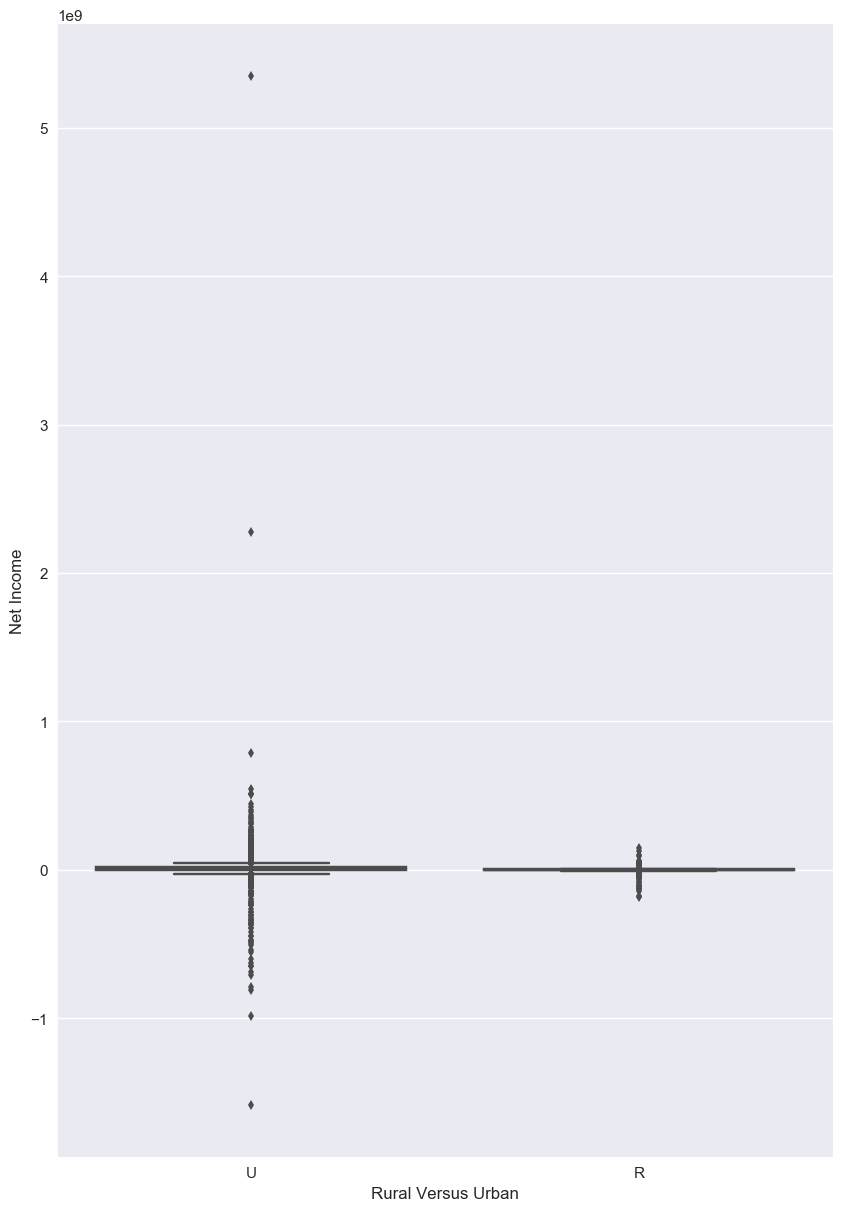

In [80]:
plt.figure(figsize=(10, 15))
sns.boxplot('Rural Versus Urban','Net Income',data=df);


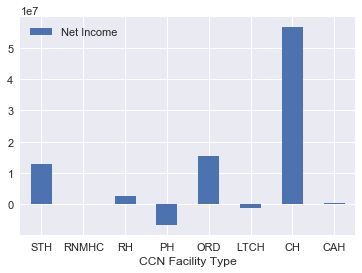

In [40]:
# Display average net income per facility type
net_ncome_vs_fac_type_df = df[['CCN Facility Type','Net Income']].groupby(['CCN Facility Type'],
as_index=False).mean().sort_values(by='CCN Facility Type', ascending=False)
ax = net_ncome_vs_fac_type_df.plot.bar(x='CCN Facility Type', y='Net Income', rot=0)


c:\python34\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


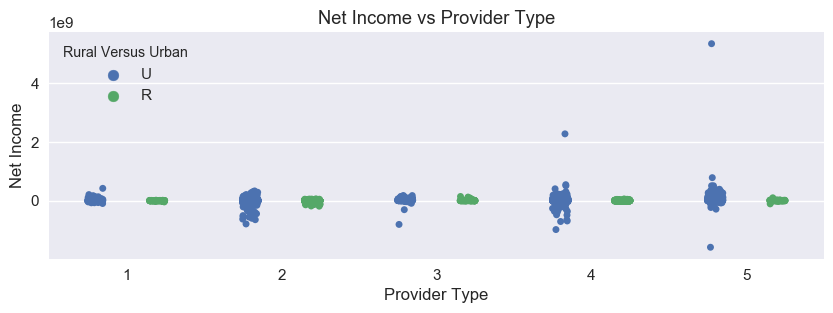

In [88]:
sns.stripplot(x="Provider Type", y="Net Income",data=df,hue='Rural Versus Urban',jitter=True,split=True)
plt.title("Net Income vs Provider Type");

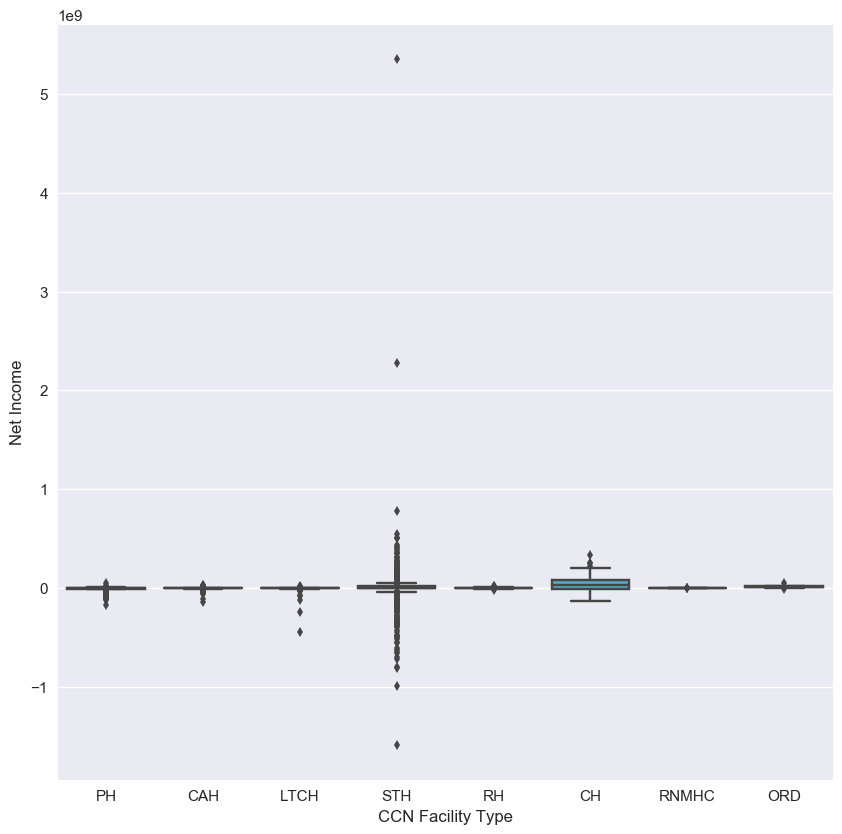

In [84]:
plt.figure(figsize=(10, 10))
sns.boxplot('CCN Facility Type','Net Income',data=df);


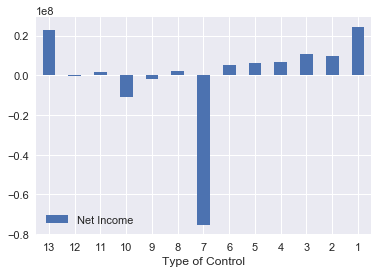

In [44]:
# Display average net income per 'Type of Control'
#Type of controls are described here: http://www.nber.org/pps/layout/9-12tbl.pdf

test_df = df[['Type of Control','Net Income']].groupby(['Type of Control'],
as_index=False).mean().sort_values(by='Type of Control', ascending=False)
ax = test_df.plot.bar(x='Type of Control', y='Net Income', rot=0)

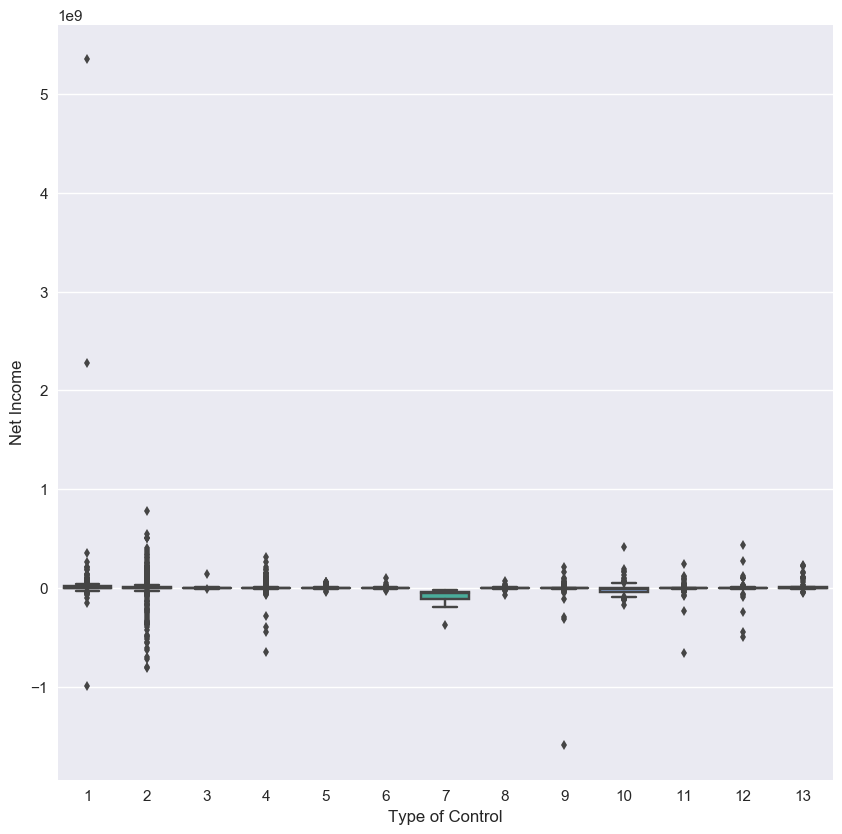

In [77]:
plt.figure(figsize=(10, 10))
sns.boxplot('Type of Control','Net Income',data=df);


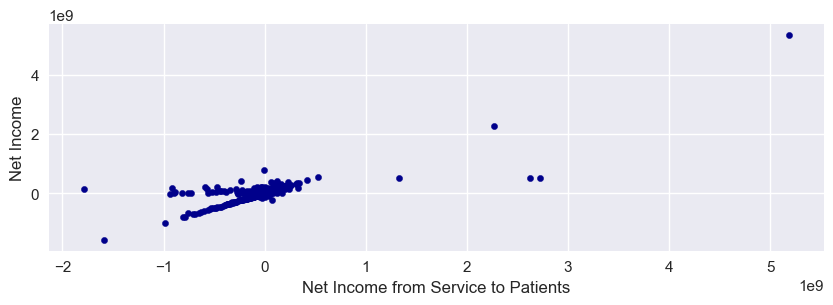

In [57]:
df.plot.scatter(x='Net Income from Service to Patients', y='Net Income', marker = 'o', c='DarkBlue')
#Looks like positive correlation

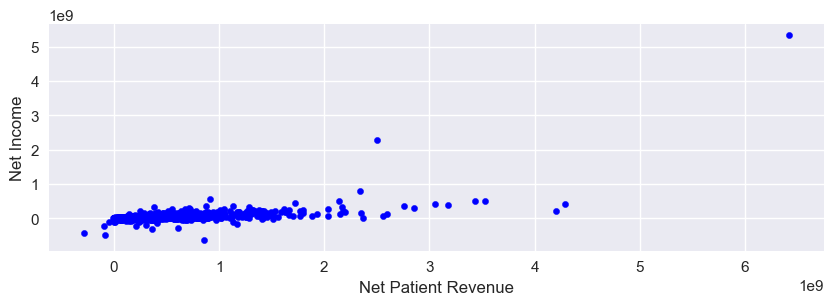

In [58]:
df.plot.scatter(x='Net Patient Revenue', y='Net Income', marker = 'o', c='Blue')
#Looks like constant correlation

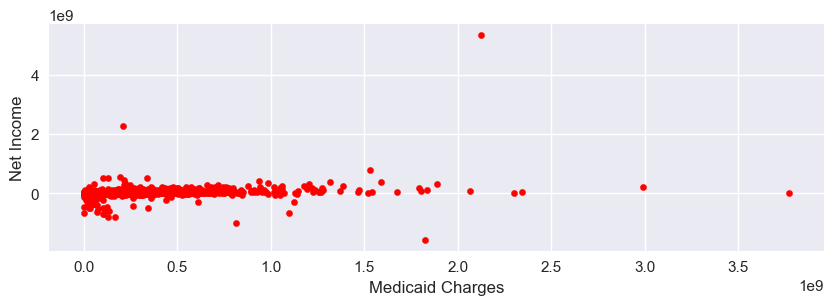

In [60]:
df.plot.scatter(x='Medicaid Charges', y='Net Income', marker = 'o', c='Red')
#Looks like constant correlation

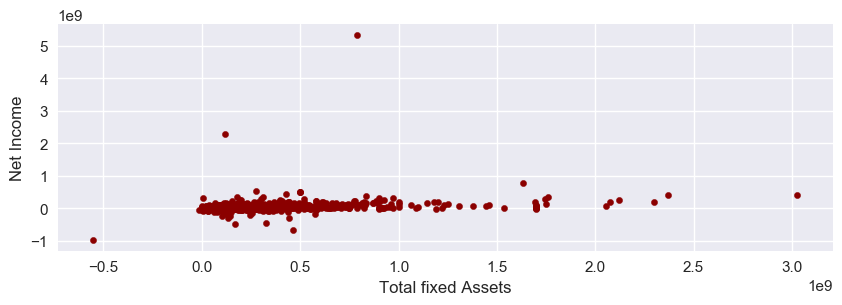

In [62]:
df.plot.scatter(x='Total fixed Assets', y='Net Income', marker = 'o', c='DarkRed')

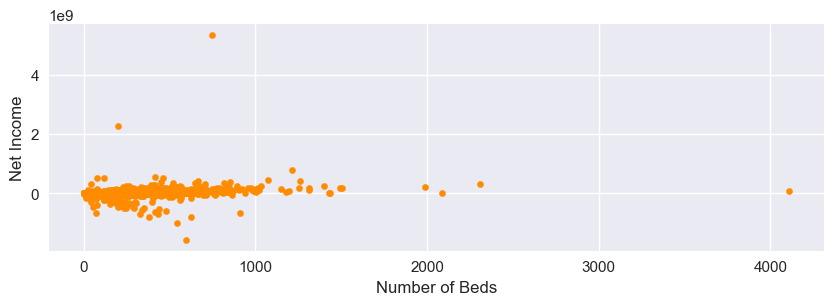

In [63]:
df.plot.scatter(x='Number of Beds', y='Net Income', marker = 'o', c='DarkOrange')

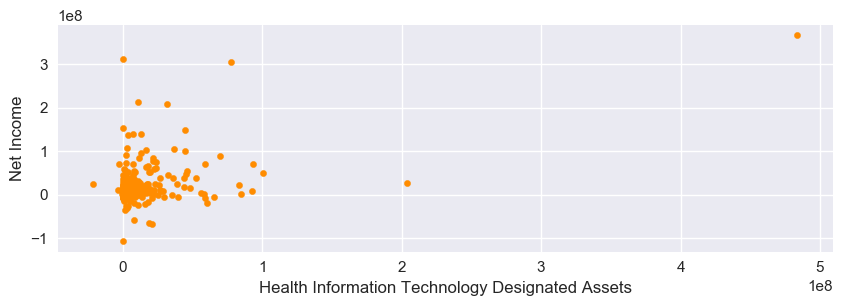

In [64]:
df.plot.scatter(x=       'Health Information Technology Designated Assets', y='Net Income', marker = 'o', c='DarkOrange')
# Looks like no correlation

In [68]:
#check average net income per state
test_df = df[['State Code','Net Income']].groupby(['State Code'],
as_index=False).mean().sort_values(by='State Code', ascending=False)
test_df.head()

,State Code,Net Income
54,WY,4.487262e+06
53,WV,1.445661e+06
52,WI,1.441989e+07
51,WA,1.302401e+07
50,VT,7.625352e+06


In [69]:
# Import libraries
import pandas as pd
import folium

# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = 'us-states.json'
state_data = test_df
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State Code','Net Income'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Average Net Income by State'
)
folium.LayerControl().add_to(m)
m

c:\python34\lib\site-packages\folium\folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [94]:
#Since net income from service to patients has a positive correlation to net income, we'll analyse it
corr=new_df.corr()["Net Income from Service to Patients"]
corr[np.argsort(corr, axis=0)[::-1]]

Net Income from Service to Patients                                 1.000000
Net Income                                                          0.801042
Total Income                                                        0.795721
Net Patient Revenue                                                 0.301519
Inpatient Revenue                                                   0.129331
Gross Revenue                                                       0.113943
Fixed Equipment                                                     0.092994
Outpatient Revenue                                                  0.084216
General Fund Balance                                                0.082768
Accounts Receivable                                                 0.056621
Inventory                                                           0.052087
Other Assets                                                        0.051168
Inpatient Total Charges                                             0.047905

In [95]:
# Net Patient Revenue seems to influence income from patients services
corr=new_df.corr()["Net Patient Revenue"]
corr[np.argsort(corr, axis=0)[::-1]]

Net Patient Revenue                                                          1.000000
Less Total Operating Expense                                                 0.918761
Total Costs                                                                  0.907715
Gross Revenue                                                                0.907684
Overhead Non-Salary Costs                                                    0.900702
Outpatient Revenue                                                           0.889412
Total Salaries From Worksheet A                                              0.874071
Combined Outpatient + Inpatient Total Charges                                0.867785
Inpatient Revenue                                                            0.866593
Outpatient Total Charges                                                     0.857964
FTE - Employees on Payroll                                                   0.851739
Inpatient Total Charges                               

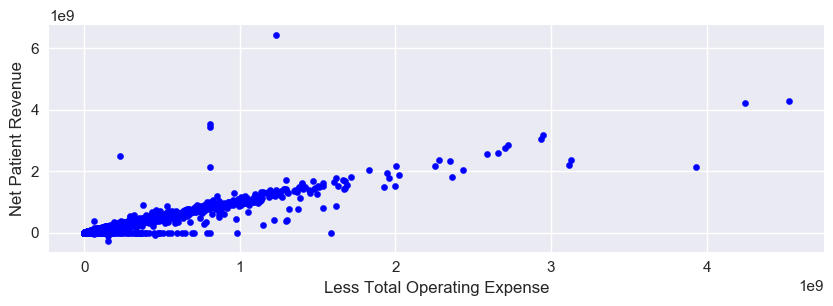

In [97]:
new_df.plot.scatter(y='Net Patient Revenue', x='Less Total Operating Expense', marker = 'o', c='Blue')
#Looks like constant correlation

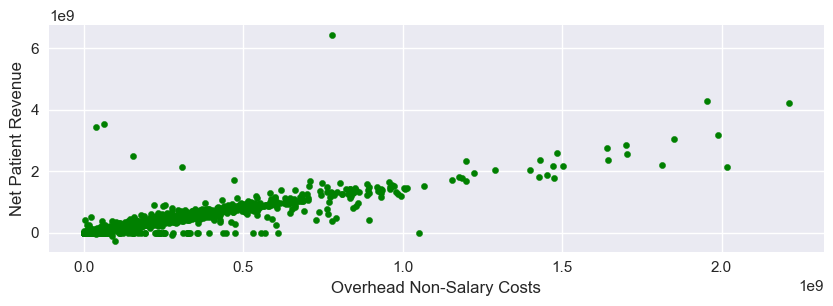

In [98]:
new_df.plot.scatter(y='Net Patient Revenue', x='Overhead Non-Salary Costs', marker = 'o', c='Green')
#Looks like constant correlation

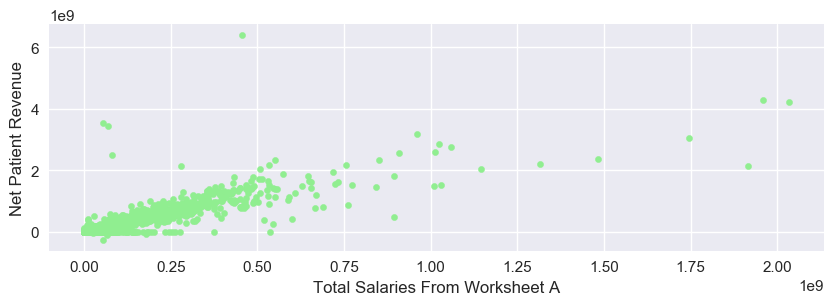

In [99]:
new_df.plot.scatter(y='Net Patient Revenue', x='Total Salaries From Worksheet A', marker = 'o', c='LightGreen')
#Looks like constant correlation

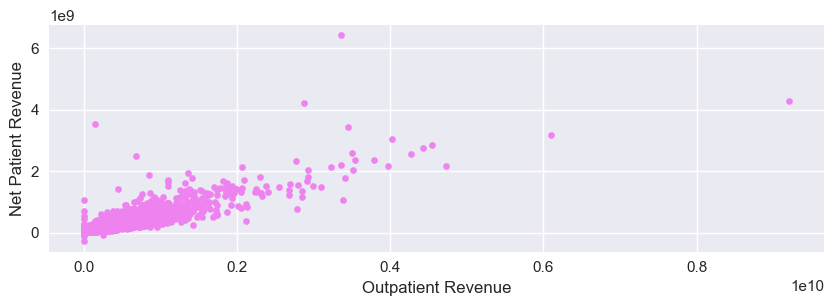

In [102]:
new_df.plot.scatter(y='Net Patient Revenue', x='Outpatient Revenue', marker = 'o', c='Violet')
#Looks like constant correlation

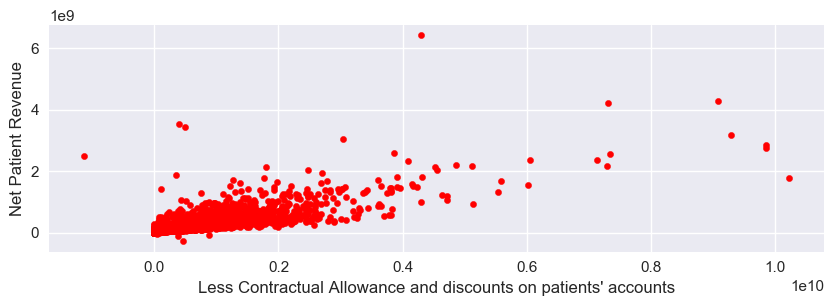

In [104]:
new_df.plot.scatter(y='Net Patient Revenue', x="Less Contractual Allowance and discounts on patients' accounts", marker = 'o', c='Red')
#Looks like constant correlation

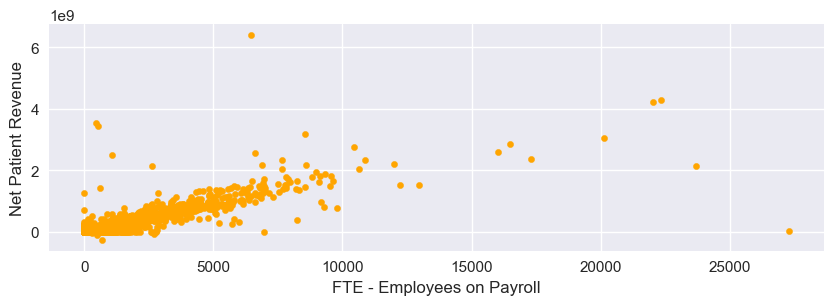

In [103]:
new_df.plot.scatter(y='Net Patient Revenue', x='FTE - Employees on Payroll', marker = 'o', c='Orange')
#Looks like constant correlation

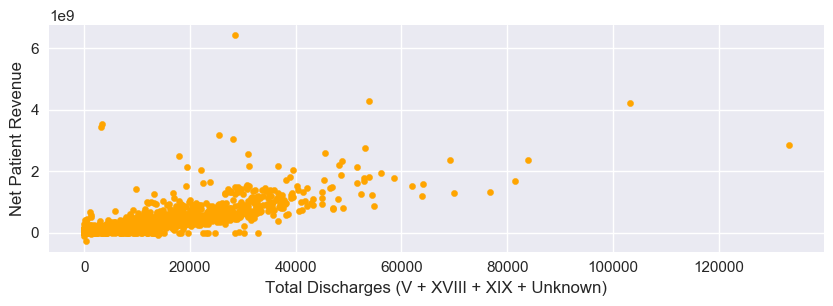

In [105]:
new_df.plot.scatter(y='Net Patient Revenue', x='Total Discharges (V + XVIII + XIX + Unknown)', marker = 'o', c='Orange')
#Looks like constant correlation

In [71]:
#It would be interesting to look at the cost of healthcare 
# https://www.kff.org/other/state-indicator/health-spending-per-capita/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [17]:
correlations=new_df.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

c:\python34\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Attribute Pair,Correlation
513,"(Total Assets, Total Liabilities and Fund Bala...",0.999893
997,"(Total Discharges Title XVIII, Total Discharge...",0.998352
509,(Hospital Total Discharges Title XVIII For Ad...,0.998352
502,(Hospital Total Discharges (V + XVIII + XIX + ...,0.998315
81,"(Total Discharges (V + XVIII + XIX + Unknown),...",0.998315
353,"(Total Discharges Title XIX, Total Discharges ...",0.996220
8,(Hospital Total Discharges Title XIX For Adul...,0.996220
1070,(Hospital Total Days Title XVIII For Adults &...,0.992475
244,(Combined Outpatient + Inpatient Total Charges...,0.989255
734,(Hospital Total Bed Days Available For Adults...,0.989028


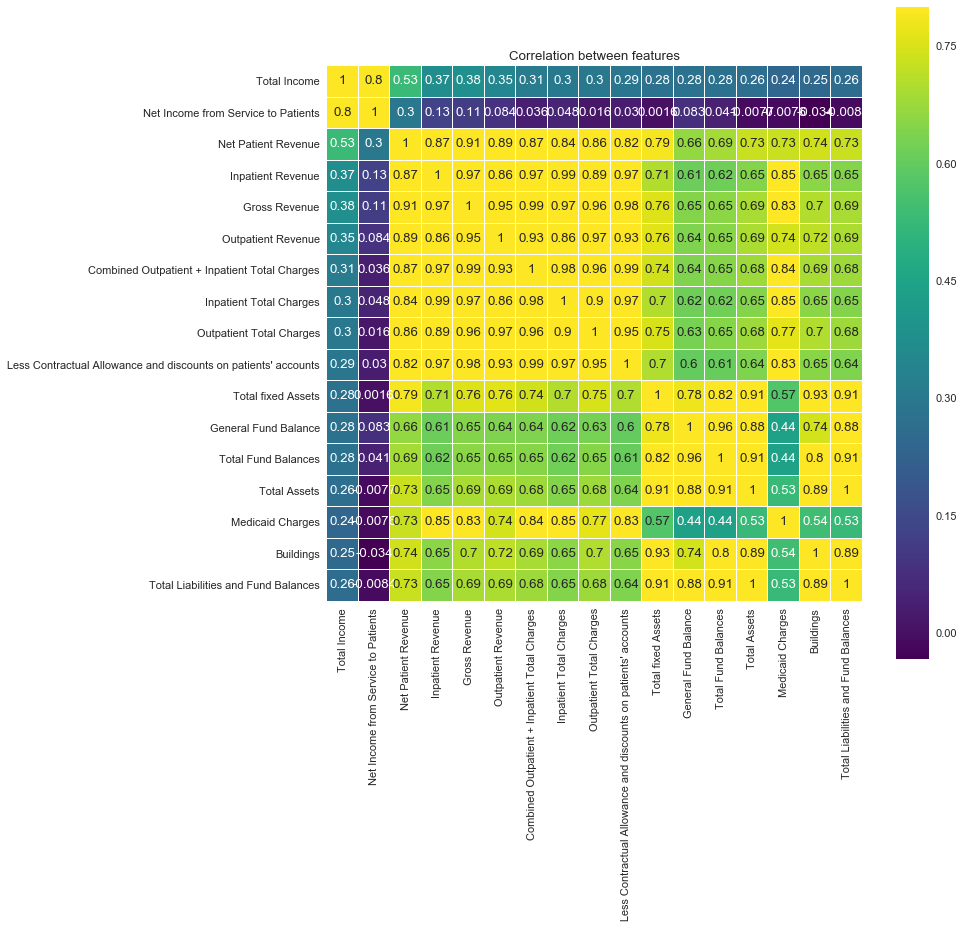

In [24]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

corrMatrix=new_df[["Total Income","Net Income from Service to Patients","Net Patient Revenue","Inpatient Revenue",
                  "Gross Revenue", "Outpatient Revenue", "Combined Outpatient + Inpatient Total Charges",
                   "Inpatient Total Charges", "Outpatient Total Charges", "Less Contractual Allowance and discounts on patients' accounts",
                   "Total fixed Assets", "General Fund Balance", "Total Fund Balances", "Total Assets", "Medicaid Charges", "Buildings", "Total Liabilities and Fund Balances"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(12, 12))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');


In [ ]:
#Drop highly correlated features